## Support Vector Machines

In [95]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [96]:
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris.feature_names)
df["class"] = iris.target
df["class_label"] = df["class"].replace({0:iris.feature_names[0], 1:iris.feature_names[1], 2:iris.feature_names[2]})

In [97]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class_label
0,5.1,3.5,1.4,0.2,0,sepal length (cm)
1,4.9,3.0,1.4,0.2,0,sepal length (cm)
2,4.7,3.2,1.3,0.2,0,sepal length (cm)
3,4.6,3.1,1.5,0.2,0,sepal length (cm)
4,5.0,3.6,1.4,0.2,0,sepal length (cm)


Think of an SVM classifier as fitting the widest possible street between the classes. **A "hard-margin" strictly imposes that all instances must be off the street**, with different classes remaining on their own side. 

Most of the time this is not possible to achieve, either due to data not being linearly seperable, or a single outlier observation that can throw out model off course. To avoid this we can use a more flexible model. **This is called soft-margin classification.**

With a "soft-margin" the goal is to find a balance between keeping the street as large as possible, and limiting the "margin violations" - these are observations that end up in the middle of the street, or even on the wrong side. 

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [99]:
df_ = df[df["class"].isin([0, 1])]
X, y = df_.iloc[:, 1:3], df_["class"]

In [100]:
# Some helper functions for contours
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy):
    xy = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.decision_function(xy).reshape(xx.shape)
    out = ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    return out

(1.8, 4.5)

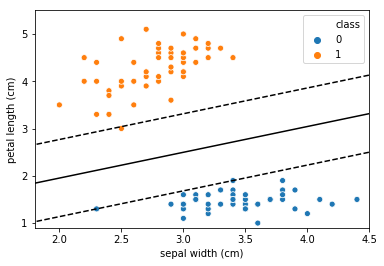

In [103]:
fig, ax = plt.subplots(1, 1)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, ax=ax);
mod = SVC(C=1, kernel="linear")
mod.fit(X, y)

xx, yy = make_meshgrid(X.iloc[:, 0], X.iloc[:, 1])
contour = plot_contours(ax, mod, xx, yy)
ax.set_ylim(0.9, 5.5)
ax.set_xlim(1.8, 4.5)